# Классификация текстов

## Сеть прямого распространения  для классификации текстов

In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.models import Model, Sequential

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import random
random.seed(1228)

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("/NLP/data/izvestya/articles_lemmatized_noSW.csv")
data = data[data.topic.isin(("Культура", "Общество", "Политика", "Экономика", "Спорт"))] 
train_corpus = pd.DataFrame(columns=data.columns)
test_corpus = pd.DataFrame(columns=data.columns)

for topic in data.topic.unique():
    corpus_sample = data[data.topic==topic].sample(110)
    train_corpus = train_corpus.append(corpus_sample.iloc[:100, :])
    test_corpus = test_corpus.append(corpus_sample.iloc[100:, :])

In [3]:
TEXT_LENGTH = 1800
VOCABULARY_SIZE = 250000
EMBEDDING_DIM = 300
DIMS = 250
MAX_FEATURES = 5000
batch_size = 32

nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 10

## Сеть прямого распространения

In [4]:
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_corpus.body)
tokenizer

In [5]:
sequences = tokenizer.texts_to_sequences(train_corpus.body)
X_train = tokenizer.sequences_to_matrix(sequences, mode='count')
sequences = tokenizer.texts_to_sequences(test_corpus.body)
X_test = tokenizer.sequences_to_matrix(sequences, mode='count')

In [6]:
print('First seq:',sequences[0])
print('First doc:',X_train[0])

First seq: [799, 2329, 4809, 3230, 3202, 1233, 2665, 1376, 3093, 887, 85, 3767, 799, 2329, 3230, 938, 2620, 374, 550, 208, 1376, 941, 2327, 1952, 3476, 486, 1, 2729, 2351, 1412, 17, 1803, 4062, 515, 184, 1989, 90, 1037, 1149, 109, 40, 538, 15, 358, 226, 1042, 3173, 2443, 25, 646, 1245, 1149, 693, 1367, 1982, 1189, 267, 40, 3193, 634, 4955, 2329, 306, 208, 455, 642, 110, 2260, 1376, 2024, 2334, 696, 676, 186, 1311, 391, 1993, 201, 1536, 1410, 2024, 2620, 1022, 1042, 101, 339, 928, 2242, 50, 488, 604, 130, 3945, 1954, 1421, 142, 3715, 308, 261, 3005, 928, 720, 40, 887, 85, 655, 3051, 390, 3292, 575, 1404, 2041, 80, 2620, 78, 4, 8, 109, 1376, 1377, 1582, 3972, 73, 56, 139, 1376, 3190, 3658, 1994, 798, 3, 520, 2785, 3105, 1089, 4775, 760, 3461, 730, 958, 888, 189, 114, 51, 123, 4938, 4947, 186, 4, 612, 2649, 400, 2121, 3872, 395, 89, 68, 642, 730, 136, 807, 1376, 1247, 935, 768, 357, 4908, 881, 887, 85, 1, 881, 1152, 1240, 82]
First doc: [0. 0. 0. ... 0. 0. 0.]


In [7]:
le = LabelEncoder()
le.fit(train_corpus.topic.unique())
y_train = np_utils.to_categorical(le.transform(train_corpus.topic), 5)
y_test = np_utils.to_categorical(le.transform(test_corpus.topic), 5)
y_true = le.transform(test_corpus.topic)
print(y_train[0])

[1. 0. 0. 0. 0.]


In [8]:
model = Sequential()
model.add(Dense(128, input_shape=(MAX_FEATURES,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,  validation_split=0.1)

Train on 450 samples, validate on 50 samples
Epoch 1/10
450/450 [==============================] - 1s 2ms/step - loss: 1.3629 - acc: 0.5022 - val_loss: 1.4553 - val_acc: 0.2600
Epoch 2/10
450/450 [==============================] - 0s 619us/step - loss: 0.4597 - acc: 0.9689 - val_loss: 1.0414 - val_acc: 0.6600
Epoch 3/10
450/450 [==============================] - 0s 552us/step - loss: 0.1975 - acc: 0.9889 - val_loss: 0.9226 - val_acc: 0.7000
Epoch 4/10
450/450 [==============================] - 0s 534us/step - loss: 0.0956 - acc: 0.9978 - val_loss: 0.9779 - val_acc: 0.6400
Epoch 5/10
450/450 [==============================] - 0s 518us/step - loss: 0.0528 - acc: 1.0000 - val_loss: 0.9958 - val_acc: 0.6000
Epoch 6/10
450/450 [==============================] - 0s 536us/step - loss: 0.0314 - acc: 1.0000 - val_loss: 0.9228 - val_acc: 0.6600
Epoch 7/10
450/450 [==============================] - 0s 502us/step - loss: 0.0224 - acc: 1.0000 - val_loss: 0.9250 - val_acc: 0.6800
Epoch 8/10
450/450 

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640128    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 640,773
Trainable params: 640,773
Non-trainable params: 0
_________________________________________________________________


             precision    recall  f1-score   support

          0       0.77      1.00      0.87        10
          1       0.86      0.60      0.71        10
          2       0.62      0.80      0.70        10
          3       0.91      1.00      0.95        10
          4       1.00      0.60      0.75        10

avg / total       0.83      0.80      0.79        50



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


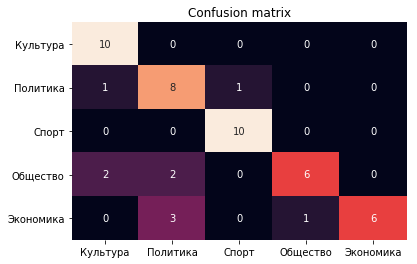

In [10]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_true, y_pred))
labels = test_corpus.topic.unique()
y_true = le.inverse_transform(y_true)
y_pred = le.inverse_transform(y_pred)
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [12]:
sequences = tokenizer.texts_to_sequences(train_corpus.body)
X_train = pad_sequences(sequences, maxlen=TEXT_LENGTH)
sequences = tokenizer.texts_to_sequences(test_corpus.body)
X_test = pad_sequences(sequences, maxlen=TEXT_LENGTH)

In [13]:
X_train[0]

array([   0,    0,    0, ..., 4593,  633, 3703], dtype=int32)

In [14]:
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE, EMBEDDING_DIM, input_length=TEXT_LENGTH))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,  validation_split=0.1)

Train on 450 samples, validate on 50 samples
Epoch 1/10
450/450 [==============================] - 94s 208ms/step - loss: 11.6617 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/10
450/450 [==============================] - 64s 143ms/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/10
450/450 [==============================] - 68s 151ms/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/10
450/450 [==============================] - 72s 161ms/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/10
450/450 [==============================] - 64s 142ms/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/10
450/450 [==============================] - 76s 168ms/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/10
450/450 [==============================] - 58s 128ms/step - loss: 12.5363 - acc: 0.2222 - val_loss

In [15]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

   Культура       0.00      0.00      0.00        10
   Общество       0.00      0.00      0.00        10
   Политика       0.00      0.00      0.00        10
      Спорт       0.20      1.00      0.33        10
  Экономика       0.00      0.00      0.00        10

avg / total       0.04      0.20      0.07        50



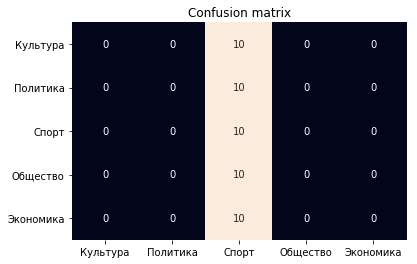

In [16]:
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [17]:
%%time

import numpy as np
emb_path = '/NLP/embeddings/wiki.ru.vec'

words = []

embeddings_index = {}
f = open(emb_path)
for line in f:
    values = line.split()
    if len(values) == 301:
        word = values[0]
        words.append(word)
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
f.close()

CPU times: user 2min 46s, sys: 9.72 s, total: 2min 56s
Wall time: 3min 11s


In [18]:
print(len(embeddings_index))

1775997


In [19]:
word_index = tokenizer.word_index
len(word_index)

32340

In [20]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [21]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=TEXT_LENGTH,
                            trainable=False))
model.add(Flatten())
model.add(Dense(128, input_shape=(MAX_FEATURES,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,  validation_split=0.1)


Train on 450 samples, validate on 50 samples
Epoch 1/10
450/450 [==============================] - 32s 72ms/step - loss: 2.6651 - acc: 0.4222 - val_loss: 2.3486 - val_acc: 0.2400
Epoch 2/10
450/450 [==============================] - 31s 68ms/step - loss: 1.2821 - acc: 0.8044 - val_loss: 4.7744 - val_acc: 0.1600
Epoch 3/10
450/450 [==============================] - 29s 65ms/step - loss: 0.8304 - acc: 0.9244 - val_loss: 1.5597 - val_acc: 0.3600
Epoch 4/10
450/450 [==============================] - 30s 67ms/step - loss: 0.6403 - acc: 0.9489 - val_loss: 1.9838 - val_acc: 0.3800
Epoch 5/10
450/450 [==============================] - 31s 68ms/step - loss: 0.6004 - acc: 0.9578 - val_loss: 1.1635 - val_acc: 0.5800
Epoch 6/10
450/450 [==============================] - 28s 62ms/step - loss: 0.3970 - acc: 0.9667 - val_loss: 5.2442 - val_acc: 0.0800
Epoch 7/10
450/450 [==============================] - 29s 64ms/step - loss: 0.1862 - acc: 0.9733 - val_loss: 4.7350 - val_acc: 0.1400
Epoch 8/10
450/45

In [22]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

   Культура       0.90      0.90      0.90        10
   Общество       0.62      0.50      0.56        10
   Политика       0.40      0.80      0.53        10
      Спорт       0.90      0.90      0.90        10
  Экономика       1.00      0.20      0.33        10

avg / total       0.77      0.66      0.64        50



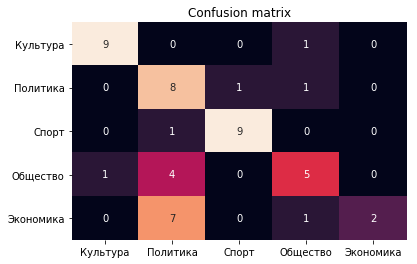

In [23]:
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

## Сверточные нейронные сети [Convolutional neural networks, CNN]

In [24]:
model = Sequential()
model.add(Embedding(VOCABULARY_SIZE,
                            EMBEDDING_DIM,
                            input_length=TEXT_LENGTH,
                            trainable=True))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, input_shape=(MAX_FEATURES,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
y_pred = model.predict_classes(X_test)
y_pred = le.inverse_transform(y_pred)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

   Культура       0.75      0.30      0.43        10
   Общество       0.00      0.00      0.00        10
   Политика       0.00      0.00      0.00        10
      Спорт       1.00      0.10      0.18        10
  Экономика       0.22      1.00      0.36        10

avg / total       0.39      0.28      0.19        50



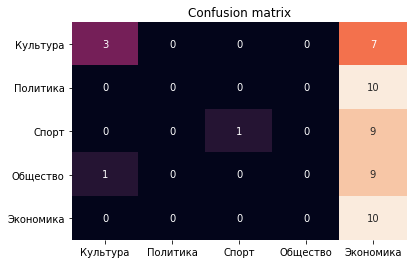

In [26]:
print(classification_report(y_true, y_pred))
sns.heatmap(data=confusion_matrix(y_true, y_pred, labels = labels), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()